In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import LedoitWolf
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


import tensorflow as tf

sns.set()

In [2]:
faultfree = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv').iloc[:,1:]
faulty = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv').iloc[:,1:]
#fftest = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Testing.csv').iloc[:,1:]

In [3]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

faultfree = faultfree.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
faulty = faulty.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
#fftest = fftest.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [4]:
df = faultfree.drop(faultfree.columns[:3], axis=1)
colnames = df.columns.tolist()
N = df.shape[1]

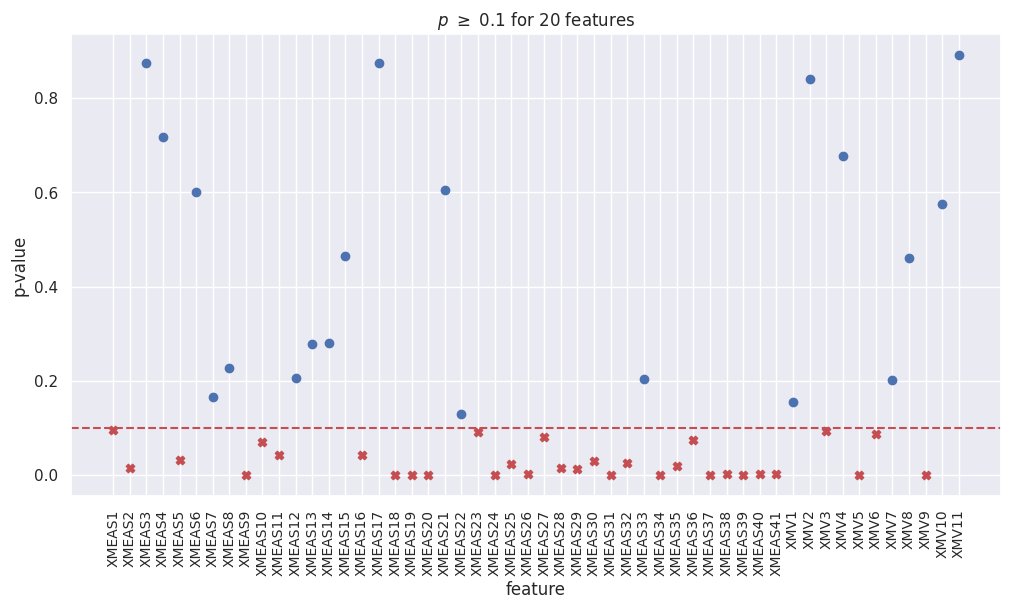

In [5]:
# Shapiro-Wilk null hypothesis

simRange = 9
alpha = 0.1 # significance level
x_axis = list(range(0,N))

def get_shapiro(DataFrame, cols, faultnum):
    shapiro_history = [] # initiate empty array, append as we go

    for col in range(len(cols)):
        data = DataFrame[(DataFrame.faultNumber == faultnum) &
         (DataFrame.simulationRun.isin(range(simRange)))][cols[col]]
        shapiro = stats.shapiro(data)
            # returns a tuple
        shapiro_history.append(shapiro)
            # create list of tuples

    return shapiro_history
        # return list of tuples

def plot_shapiro(shapiro_history):
    W, p = zip(*shapiro_history)

    # Color the points based on whether their p-value is below or equal to the threshold
    colors = ['r' if val <= alpha else 'b' for val in p]


    plt.figure(figsize=(12, 6))
    for i, val in enumerate(p):
        style = 'X' if val <= alpha else 'o'
        plt.scatter(i, val, c=colors[i], marker=style)

    plt.axhline(y=alpha, color='r', linestyle='--')
    plt.title(r'$p\ \geq$ {0} for {1} features'.format(alpha, len([i for i in p if i >= alpha])))
    plt.xlabel('feature')
    plt.ylabel('p-value')

    # Assuming colnames is defined in your code
    new_xticks = range(len(p))
    new_xtick_labels = colnames
    plt.xticks(new_xticks, new_xtick_labels, rotation=90, fontsize=10)

    plt.show()


def get_normal_features(DataFrame, cols, faultnum=0):
    variable_names = []  # initiate empty array for variable names

    for col in range(len(cols)):
        data = DataFrame[(DataFrame.faultNumber == faultnum) &
         (DataFrame.simulationRun.isin(range(simRange)))][cols[col]]
        shapiro = stats.shapiro(data)
        p_value = shapiro[1]  # Extract the p-value from the tuple

        if p_value > alpha:
            variable_names.append(cols[col])

    return variable_names

fault_free_shapiro = get_shapiro(faultfree, faultfree.columns[3:55], faultnum=0)
plot_shapiro(fault_free_shapiro)
normal_features = get_normal_features(faultfree, faultfree.columns[3:55], faultnum=0)

In [6]:
normal_features

['XMEAS3',
 'XMEAS4',
 'XMEAS6',
 'XMEAS7',
 'XMEAS8',
 'XMEAS12',
 'XMEAS13',
 'XMEAS14',
 'XMEAS15',
 'XMEAS17',
 'XMEAS21',
 'XMEAS22',
 'XMEAS33',
 'XMV1',
 'XMV2',
 'XMV4',
 'XMV7',
 'XMV8',
 'XMV10',
 'XMV11']

-----------------------------------------------

In [7]:
class MLClassifier:
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        '''
        # no. of variables / dimension
        self.d = x.shape[1]

        # no. of classes; assumes labels to be integers from 0 to nclasses-1
        self.nclasses = len(set(y))

        # list of means; mu_list[i] is mean vector for label i
        self.mu_list = []

        # list of inverse covariance matrices;
        # sigma_list[i] is inverse covariance matrix for label i
        # for efficiency reasons we store only the inverses
        self.sigma_inv_list = []

        # list of scalars in front of e^...
        self.scalars = []

        n = x.shape[0]
        for i in range(self.nclasses):

            # subset of obesrvations for label i
            cls_x = np.array([x[j] for j in range(n) if y[j] == i])

            mu = np.mean(cls_x, axis=0)

            # rowvar = False, this is to use columns as variables instead of rows
            sigma = np.cov(cls_x, rowvar=False)
            if np.sum(np.linalg.eigvals(sigma) <= 0) != 0:
                # if at least one eigenvalue is <= 0 show warning
                print(f'Warning! Covariance matrix for label {cls} is not positive definite!\n')

            sigma_inv = np.linalg.inv(sigma)

            scalar = 1/np.sqrt(((2*np.pi)**self.d)*np.linalg.det(sigma))

            self.mu_list.append(mu)
            self.sigma_inv_list.append(sigma_inv)
            self.scalars.append(scalar)

    def _class_likelihood(self, x: np.ndarray, cls: int) -> float:
        '''
        x - numpy array of shape (d,)
        cls - class label

        Returns: likelihood of x under the assumption that class label is cls
        '''
        mu = self.mu_list[cls]
        sigma_inv = self.sigma_inv_list[cls]
        scalar = self.scalars[cls]
        d = self.d

        exp = (-1/2)*np.dot(np.matmul(x-mu, sigma_inv), x-mu)

        return scalar * (np.e**exp)

    def predict(self, x: np.ndarray) -> int:
        '''
        x - numpy array of shape (d,)
        Returns: predicted label
        '''
        likelihoods = [self._class_likelihood(x, i) for i in range(self.nclasses)]
        return np.argmax(likelihoods)

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        Returns: accuracy of predictions
        '''
        n = x.shape[0]
        predicted_y = np.array([self.predict(x[i]) for i in range(n)])
        n_correct = np.sum(predicted_y == y)
        return n_correct/n

In [8]:
faultfree_normal = faultfree[normal_features]

faultfree_normal['Faulty'] = False
faultfree_normal

<ipython-input-8-0789c6074d9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faultfree_normal['Faulty'] = False


,XMEAS3,XMEAS4,XMEAS6,XMEAS7,XMEAS8,XMEAS12,XMEAS13,XMEAS14,XMEAS15,XMEAS17,...,XMEAS22,XMEAS33,XMV1,XMV2,XMV4,XMV7,XMV8,XMV10,XMV11,Faulty
0,4529.0,9.2320,42.402,2704.3,74.863,51.435,2632.9,25.029,50.528,22.819,...,77.047,18.579,62.881,53.744,62.544,42.323,47.757,41.258,18.447,False
1,4556.6,9.4264,42.576,2705.0,75.000,50.154,2633.8,24.419,48.772,23.333,...,77.434,18.579,63.132,53.414,59.259,38.554,43.692,41.359,17.194,False
2,4477.8,9.4426,42.070,2706.2,74.771,50.302,2635.5,25.244,50.071,21.924,...,77.466,18.765,63.117,54.357,61.275,38.990,46.699,41.199,20.530,False
3,4512.1,9.4776,42.063,2707.2,75.224,49.990,2635.6,23.268,50.435,22.948,...,77.443,18.765,63.100,53.946,59.856,38.072,47.541,41.643,18.089,False
4,4497.0,9.3381,42.650,2705.1,75.388,51.310,2632.4,26.099,50.480,22.808,...,76.947,18.666,63.313,53.658,60.717,41.955,47.645,41.507,18.461,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,4473.0,9.1949,42.379,2700.2,75.533,48.628,2628.4,24.419,51.045,22.738,...,77.098,18.837,63.443,53.429,60.773,34.064,48.953,40.812,18.756,False
249996,4506.2,9.2109,42.291,2700.6,75.935,51.544,2628.5,25.637,51.954,22.464,...,77.602,18.669,62.542,53.830,61.517,42.645,51.055,40.933,19.360,False
249997,4478.3,9.1957,42.448,2700.3,74.706,50.567,2628.7,25.430,50.102,22.465,...,77.493,18.669,62.979,54.163,61.656,39.770,46.770,41.465,19.344,False
249998,4486.4,9.2832,42.757,2697.4,75.101,51.418,2625.7,24.280,48.742,22.815,...,77.418,18.907,62.286,53.453,61.564,42.274,43.623,39.835,18.512,False


In [9]:
shewhart = {} # dictionary of limits

for feature in normal_features:

    mean = faultfree_normal[feature].mean()
    std = faultfree_normal[feature].std()

    upperlim = mean + 3*std
    lowerlim = mean - 3*std

    shewhart[feature] = (lowerlim, upperlim)

def is_within_limits(value, limits):
    return (value >= limits[0] and value <= limits[1])

def is_sample_faulty(sample, shewhart_dict):
    for feature, limits in shewhart_dict.items():
        if not is_within_limits(sample[feature], limits):
            return True
    return False


In [10]:
faulty_train = faulty[faulty['simulationRun'].isin(range(1,100))]

faulty_train_select = faulty_train.drop(columns=['simulationRun', 'sample'])
faulty_train_select

,faultNumber,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989995,20,0.27154,3718.5,4488.8,9.3726,27.248,42.390,2697.0,75.288,120.40,...,54.643,26.197,59.045,20.427,39.735,36.888,47.630,42.711,40.571,17.616
989996,20,0.25885,3685.3,4479.2,9.2665,27.016,42.438,2693.9,75.920,120.43,...,53.058,25.950,58.641,19.792,40.025,34.960,45.814,43.087,41.973,19.075
989997,20,0.25763,3694.4,4427.5,9.2671,27.014,42.498,2690.7,75.580,120.38,...,53.677,26.069,63.245,19.718,40.158,41.243,46.555,43.311,40.442,16.447
989998,20,0.24222,3630.9,4496.0,9.3749,26.914,42.523,2690.1,75.577,120.40,...,53.571,23.936,60.422,19.533,39.043,38.164,46.781,43.615,42.028,18.748


In [11]:
faulty_test = faulty[faulty['simulationRun'].isin(range(101,200))]
faulty_test_select = faulty_test.drop(columns=['simulationRun', 'sample'])
faulty_test_select

,faultNumber,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
1000000,1,0.24949,3699.1,4478.6,9.4694,27.200,42.369,2704.4,75.394,120.38,...,54.347,24.745,59.627,22.379,40.131,40.863,43.792,47.515,39.968,18.207
1000001,1,0.25039,3662.8,4524.2,9.2921,26.682,41.928,2707.0,74.664,120.44,...,53.801,24.657,60.462,22.133,40.009,38.018,48.114,47.350,41.603,19.206
1000002,1,0.25123,3650.8,4517.6,9.4580,26.924,42.425,2705.9,75.859,120.39,...,53.880,24.582,61.499,22.004,40.061,30.374,47.387,47.447,40.488,16.684
1000003,1,0.25101,3664.1,4509.2,9.3181,27.212,42.417,2704.0,74.995,120.43,...,53.980,24.604,61.271,22.077,40.310,37.926,46.679,47.522,41.832,16.985
1000004,1,0.28330,3679.3,4545.0,9.3661,26.940,42.449,2704.5,76.393,120.38,...,53.943,28.156,61.361,22.346,40.663,39.562,48.829,47.605,40.475,18.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989995,20,0.21086,3670.2,4593.8,9.2960,26.968,42.224,2727.4,75.560,120.36,...,54.817,20.538,61.913,18.056,37.186,38.688,47.323,47.608,39.577,19.831
1989996,20,0.23786,3626.0,4586.1,9.3079,26.878,42.320,2728.4,75.420,120.41,...,54.765,23.919,62.628,17.381,40.831,40.087,42.351,47.637,41.717,18.379
1989997,20,0.23932,3688.7,4569.2,9.2625,27.104,42.539,2727.7,75.204,120.37,...,54.967,23.775,60.412,17.503,40.633,35.043,47.198,47.583,40.651,18.744
1989998,20,0.23123,3623.0,4551.6,9.3402,27.002,41.949,2728.0,76.026,120.40,...,55.184,22.441,59.800,17.290,38.770,39.022,45.891,47.304,40.849,17.088


In [16]:
faultnum = 3

faulty_select_idv = faulty_train_select[faulty_train_select['faultNumber']==faultnum][normal_features].reset_index(drop=True)
faulty_select_idv['Faulty'] = faulty_select_idv.apply(lambda row: is_sample_faulty(row, shewhart), axis=1)

merged_df = pd.concat([faultfree_normal, faulty_select_idv])
X_train = merged_df.iloc[:,:-1].values
y_train = merged_df.iloc[:,-1].values

faulty_test_idv = faulty_test_select[faulty_test_select['faultNumber']==faultnum][normal_features].reset_index(drop=True)
faulty_test_idv['Faulty'] = True
X_test = faulty_test_idv.iloc[:,:-1].values
y_test = faulty_test_idv.iloc[:,-1].values

#(X_train, X_test, y_train, y_test) = train_test_split(merged_df_FEATURES.values, merged_df_TARGET.values, train_size=0.9)

mlc = MLClassifier() # invoke an instance of the classifier
mlc.fit(X_train, y_train)
score = mlc.score(X_test, y_test)

print(f'IDV{faultnum}: {score}')


IDV3: 0.2203030303030303


In [18]:
sum(y_train)/len(y_train)

0.007108514190317195

In [ ]:
for faultnum in range(1,21):

    faulty_select_idv = faulty_train_select[faulty_train_select['faultNumber']==faultnum][normal_features].reset_index(drop=True)
    faulty_select_idv['Faulty'] = faulty_select_idv.apply(lambda row: is_sample_faulty(row, shewhart), axis=1)

    merged_df = pd.concat([faultfree_normal, faulty_select_idv])
    X_train = merged_df.iloc[:,:-1].values
    y_train = merged_df.iloc[:,-1].values

    faulty_test_idv = faulty_test_select[faulty_test_select['faultNumber']==faultnum][normal_features].reset_index(drop=True)
    faulty_test_idv['Faulty'] = True
    X_test = faulty_test_idv.iloc[:,:-1].values
    y_test = faulty_test_idv.iloc[:,-1].values

    #(X_train, X_test, y_train, y_test) = train_test_split(merged_df_FEATURES.values, merged_df_TARGET.values, train_size=0.9)

    mlc = MLClassifier() # invoke an instance of the classifier
    mlc.fit(X_train, y_train)
    score = mlc.score(X_test, y_test)

    print(f'IDV{faultnum}: {score:.4f}')

IDV1: 0.9498
IDV2: 0.8957
IDV3: 0.2203
IDV4: 0.9600
IDV5: 0.9444
IDV6: 0.9306
IDV7: 0.9600
IDV8: 0.8933
IDV9: 0.2067
IDV10: 0.3575
IDV11: 0.7673
IDV12: 0.9312
IDV13: 0.8659
IDV14: 0.9597
IDV15: 0.2133
IDV16: 0.2478
IDV17: 0.7767
IDV18: 0.8308
IDV19: 0.4302
IDV20: 0.6213


In [ ]:
y_test

array([ True,  True,  True, ..., False, False, False])

In [ ]:
check = faulty_select_idv['Faulty'].values
sum(y_train)/len(y_train)

0.01429382303839733